In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from analytics_labels import *
from analytics_functions import clean_activations

In [14]:
data = [
    'csv/0-vel-1-0.csv',
    'csv/0-vel-1-1.csv',
    'csv/0-vel-1-2.csv',
    'csv/0-vel-2-0.csv',
    'csv/0-vel-2-1.csv',
    'csv/0-vel-2-2.csv',
    'csv/0-vel-3-0.csv',
    'csv/0-vel-3-1.csv',
    'csv/0-vel-3-2.csv',
]

acts = [ACT0, ACT1, ACT2, ACT3, ACT4]

df = pd.DataFrame()

for d in data:
    df_temp = pd.read_csv(d)

    df_temp = df_temp[df_temp[DIST] < 20]
    df_temp[DIST] = df_temp[DIST].apply(lambda x: 22 - x)
    
    for a in acts:
        df_temp[a] = df_temp[a].apply(clean_activations)
        df_temp[a] = df_temp[a].apply(np.median)

    df = df.append(df_temp)

    # df = df[df[DIST] < 20]
    # ys = df[ACT0].apply(np.median)
    # dist = 22 - df[DIST]
    # fig = plt.figure()
    # plt.plot(dist, ys)
    # plt.xlabel('Distance')
    # plt.ylabel('Activation')
#    plt.title('Activation for the whole FOV approaching a tree')
#    plt.savefig('figures/act-tree-FOV-120')

In [22]:
vs = [1, 2, 3]

for v in vs:
    print('\n Velocity ' + str(v) + ':')
    data = df[df[VEL] == v]
    for a in acts:
        print('\n  - ' + a + ':\n')
        print('    - Mean: ' + str(round(np.mean(data[a]), 2)))
        print('    - Median: ' + str(round(np.median(data[a]), 2)))
        print('    - Std: ' + str(round(np.std(data[a]), 2)))



 Velocity 1:

  - activation_0:

    - Mean: 99.59
    - Median: 93.74
    - Std: 35.08

  - activation_1:

    - Mean: 86.83
    - Median: 84.69
    - Std: 28.19

  - activation_2:

    - Mean: 80.53
    - Median: 79.9
    - Std: 21.17

  - activation_3:

    - Mean: 94.06
    - Median: 92.68
    - Std: 16.88

  - activation_4:

    - Mean: 42.18
    - Median: 42.09
    - Std: 9.49

 Velocity 2:

  - activation_0:

    - Mean: 208.37
    - Median: 206.29
    - Std: 57.09

  - activation_1:

    - Mean: 120.99
    - Median: 111.45
    - Std: 35.74

  - activation_2:

    - Mean: 105.17
    - Median: 100.33
    - Std: 29.61

  - activation_3:

    - Mean: 207.94
    - Median: 208.78
    - Std: 25.35

  - activation_4:

    - Mean: 95.13
    - Median: 94.11
    - Std: 12.54

 Velocity 3:

  - activation_0:

    - Mean: 413.84
    - Median: 411.99
    - Std: 91.29

  - activation_1:

    - Mean: 430.45
    - Median: 430.27
    - Std: 64.38

  - activation_2:

    - Mean: 196.96
    - Med

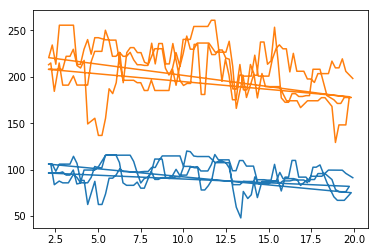

In [29]:
df_plot = df[df[VEL] == 2]

plt.plot(df_plot[DIST], df_plot[ACT4])
plt.plot(df_plot[DIST], df_plot[ACT3])